*Supporting textbook chapters: §§ 9.3.3, 9.3.4*

Lecture 9, topics:
* Stability,
* Implicit and Crank-Nicolson methods,
* Spectral methods.

## Recall...

$$ \alpha\frac{\partial^2 \phi}{\partial x^2} + \beta\frac{\partial^2 \phi}{\partial x\partial y} + \gamma\frac{\partial^2 \phi}{\partial y^2} + \delta\frac{\partial\phi}{\partial x} + \varepsilon \frac{\partial\phi}{\partial y} = f.$$

Classification based on $$ \Delta = \beta^2 - 4\alpha \gamma.$$

1. $\Delta = 0$: parabolic PDE,
3. $\Delta < 0$: elliptic PDE,
2. $\Delta > 0$: hyperbolic PDE.

![By Pbroks13 [CC BY 3.0  (https://creativecommons.org/licenses/by/3.0)], from Wikimedia Commons](500px-Conic_sections_with_plane.png)

1. Canonical parabolic PDE: the diffusion equation, $\ \displaystyle \kappa \nabla^2 \phi  - \frac{\partial T}{\partial t} = 0$,
3. Canonical elliptic PDE: the Poisson equation, $\ \nabla^2 \phi = \rho$,
2. Canonical hyperbolic PDE: the wave equation, $\ \displaystyle c^2 \nabla^2 \phi  - \frac{\partial^2 T}{\partial t^2} = 0.$

* Discretize system spatially and temporally. Can use finite differences, spectral coefficients, etc.
* Elliptical equations (e.g., Poisson eqn.):
    * Jacobi relaxation (always stable),
    * Speed-up with overrelaxation (not always stable),
    * Gauss-Seidel (overrelaxed or not): replace on the fly; more stable than Jacobi when overrelaxing.
* Parabolic PDEs (e.g., heat eqn):
    * FTCS (Forward Time, Centred Space) scheme: centred finite-diff. in space, forward Euler in time
    * Stable if sufficient spatial resolution.

* Hyperbolic PDEs (e.g., wave eqn.):
    * Von Neumann analysis says FTCS never stable.
    * This week: better schemes for hyperbolic PDEs.
* Von Neumann stability analysis: plug a Fourier mode, see if it grows or not.

**Today: stable and accurate schemes for Hyperbolic PDEs?**

# The implicit method

We have choices on how to discretize in time the set of ODEs
$$\frac{\partial \phi_m}{\partial t} = \psi_m, \quad \text{and}\quad \frac{\partial \psi_m}{\partial t} = \frac{c^2}{a^2}\left(\phi_{m+1} - 2\phi_m + \phi_{m-1}\right)$$

"Explicit" method we saw last time was
$$
    \begin{bmatrix}
        \phi_m^{n+1} \\
        \psi_m^{n+1}
    \end{bmatrix}
    = 
    \begin{bmatrix}
        1 & +h \\
        -\frac{2hc^2}{a^2} & 1
    \end{bmatrix}
    \begin{bmatrix}
        \phi_m^{n} \\
        \psi_m^{n}
    \end{bmatrix}
    +
    \begin{bmatrix}
        0 \\
        \frac{c^2 h}{a^2}\left(\phi_{m+1}^n + \phi_{m-1}^n\right)
    \end{bmatrix}
$$

But what if we evaluate the RHS at time $t+h$ instead of $t$?

To compute with the "implicit method" 
* first do $h\to -h$ (from the current time step, compute the *previous* one):
    \begin{align*}
        \phi_m^{n-1} & = \phi_m^{n} - h\psi_m^{n},\\
        \psi_m^{n-1} & = \psi_m^{n} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right),
    \end{align*}
* Then, $n \to n+1$ (one shift forward in time):
    \begin{align*}
        \phi_m^{n} & = \phi_m^{n+1} - h\psi_m^{n+1},\\
        \psi_m^{n} & = \psi_m^{n+1} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right),
    \end{align*}
    or 
    $$
    \begin{bmatrix}
        \phi_m^n \\
        \psi_m^n
    \end{bmatrix}
    = 
    \begin{bmatrix}
        1 & -h \\
        +\frac{2hc^2}{a^2} & 1
    \end{bmatrix}
    \begin{bmatrix}
        \phi_m^{n+1} \\
        \psi_m^{n+1}
    \end{bmatrix}
    -
    \begin{bmatrix}
        0 \\
        \frac{c^2 h}{a^2}\left(\phi_{m+1}^{n+1} + \phi_{m-1}^{n+1}\right)
    \end{bmatrix}
    $$

"Implicit": we now have a set of simultaneous equations relating the values of $\phi,~\psi$ at $t$ to their values at $t+h$.

Why bother solving these simultaneous equations, rather than using an "explicit" expression for the values of $\phi,~\psi$ at $t+h$ given their values at $t$ ?

Because of stability.

## Stability
Examine implicit step
$$ 
\begin{bmatrix}
    \phi_m^n \\
    \psi_m^n
\end{bmatrix}
= 
\begin{bmatrix}
    1 & -h \\
    +\frac{2hc^2}{a^2} & 1
\end{bmatrix}
\begin{bmatrix}
    \phi_m^{n+1} \\
    \psi_m^{n+1}
\end{bmatrix}
-
\begin{bmatrix}
    0 \\
    \frac{c^2 h}{a^2}\left(\phi_{m+1}^{n+1} + \phi_{m-1}^{n+1}\right)
\end{bmatrix}
$$

If we do the Von Neumann substitution, $\left(\phi_m^n, \psi_m^{n}\right) = \left(\widehat \phi_k^n, \widehat \psi_k^n\right)\exp(i kma)$, we get

$$
\mathbf B
\begin{bmatrix}
    \widehat\phi_k^{n+1} \\
    \widehat\psi_k^{n+1}
\end{bmatrix}=
\begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
    \widehat\phi_k^{n+1} \\
    \widehat\psi_k^{n+1}
\end{bmatrix}
=
\mathbf B^{-1}
\begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix}.
$$
with:
$$ \mathbf B = 
\begin{bmatrix}
    1 & -h \\
    hr^2 & 1
\end{bmatrix}, 
r = \frac{2c}{a}\sin\frac{ka}{2}
$$

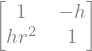

In [14]:
from sympy import *
init_printing()
h, r = symbols('h, r', positive=True)
B = Matrix([[1, -h], [h*r**2, 1]])
B 

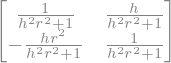

In [15]:
# inverse of B
B**-1

In [16]:
# eigenvalues as a list
L = list((B**-1).eigenvals().keys())

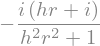

In [17]:
# First eigenvalue
L[0].factor()

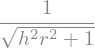

In [18]:
# Magnitude of first eigenvalue
abs(L[0].factor())

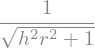

In [19]:
# Magnitude of 2nd eigenvalue
abs(L[1].factor())

$$\text{Recall}\quad
\begin{bmatrix}
    \widehat\phi_k^{m+1} \\
    \widehat\psi_k^{m+1}
\end{bmatrix}
=
\mathbf B^{-1}
\begin{bmatrix}
    \widehat\phi_k^{m} \\
    \widehat\psi_k^{m}
\end{bmatrix}.
$$
The eigenvalues of $\mathbf B^{-1}$ are $$\lambda_\pm = \frac{1\pm ihr}{1+h^2r^2}, \qquad |\lambda_\pm| = \frac{1}{\sqrt{1 + h^2r^2}} \leq 1.$$

* The eigenvalues are the growth factors and these are less than one.
* So the implicit method is unconditionally stable.
* But solutions decay exponentially! This is a big problem e.g. for the wave equation (all Fourier components of our solution, except k=0, die away... meaning a wave cannot propagate)

# Crank-Nicolson

Crank-Nicolson: average of explicit (fwd Euler) and implicit methods.

Forward Euler, Explicit:
$$ 
\begin{align}
\phi_m^{n+1} &= \phi_m^{n} + h\psi_m^{n}, & \psi_m^{n+1} = \psi_m^{n} + h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
\end{align}
$$
Backward Euler, Implicit:
$$ 
\begin{align}
\phi_m^{n+1} - h\psi_m^{n+1} &= \phi_m^n, &\psi_m^{n} = \psi_m^{n+1} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right).
\end{align}
$$
Crank-Nicholson (C-N):
$$ 
\phi_m^{n+1} - \frac{h}2\psi_m^{n+1} = \phi_m^{n} + \frac{h}2\psi_m^{n}
$$
$$ \psi_m^{n+1} - \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right) = \psi_m^{n} + \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
$$

If we do the Von Neumann substitution, $\left(\phi_m^n, \psi_m^n\right) = \left(\widehat \phi_k^n, \widehat \psi_k^n\right)\exp(i kma)$, we get

$$\mathbf{B'}
\begin{bmatrix}
    \widehat\phi_m^{n+1} \\
    \widehat\psi_m^{n+1}
\end{bmatrix}
=
\mathbf{A'}
\begin{bmatrix}
    \widehat\phi_m^{n} \\
    \widehat\psi_m^{n}
\end{bmatrix},
$$
or 
$$
\begin{bmatrix}
    \widehat\phi_m^{n+1} \\
    \widehat\psi_m^{n+1}
\end{bmatrix}
=
\mathbf{B'^{-1}A'}
\begin{bmatrix}
    \widehat\phi_m^{n} \\
    \widehat\psi_m^{n},
\end{bmatrix}
$$
with
$$
\mathbf{B'^{-1}A'}
= \frac{a}{1 + h^2 r'^2}
\begin{bmatrix}
    1 - h^2 r'^2 & 2 h \\
    -2hr'^2 & 1-h^2r'^2
\end{bmatrix},
\quad r' = \frac{c}{a}\sin\frac{ka}{2}
$$

Growth factors of Crank-Nicolson are eigenvalues of $\mathbf{B^{-1}A}$:
$$\lambda_\pm = \frac{1 \pm 2ihr' - h^2 r'^2}{1 + h^2 r'^2},\quad \boxed{|\lambda_\pm| = 1}.$$

* For Forward-Euler (Explicit), the growth factors are greater than one and the solution diverges.
* For Backward-Euler (Implicit), the growth factors are less than one and the solution decays to zero.
* For CN, the growth factors are one so the solution neither grows nor decays.
* It is also 2nd-order accurate in time, while both explicit and implicit methods are 1st-order accurate (*I won't show it but it is true*).

# Spectral methods

General idea (for linear PDEs):

* Find yourself a set of orthogonal functions forming a basis of your function space
* Use transforms to express trial solution and its derivative(s) in this basis, with unknown coefficients
  * Remember, any linear combination of solutions is also itself a solution
* Use transforms to project initial conditions onto that basis, and use them to determine the coefficients
* Use inverse transforms to directly obtain the solution at any specified coordinates (e.g. at any time $t$, without stepping through all the previous time-steps)

Examples of "set of orthogonal functions forming a basis of your function space":

 * $\sin(n\pi x/L)$, $n\in \mathbb N$ if quantity is zero at boundaries (assuming $x=0$, $L$ are the boundaries) or function is odd w.r.t. midline of domain (assuming $x=0$ at midline),
 * $\cos(n\pi x/L)$, $n\in \mathbb N$ if quantity has zero derivatives at boundaries (assuming $x=0$, $L$ are the boundaries) or function is even w.r.t. midline of domain (assuming $x=0$ at midline),
 * $\exp(i n\pi x/L)$, $n\in \mathbb N$ if quantity is periodic,
 * Chebyshev polynomials for more flexible combinations of boundary conditions or non-periodic, closed domains,
 * Hermite polynomials on the $(-\infty, \infty)$ real line,
 * Laguerre polynomials on the $(0, \infty)$ real half-line

We focus on $\sin$/$\cos$/$\exp$ bases, sometimes called "Fourier spectral methods"

* $\ominus$ large down-payment cost of computing FFTs
* $\oplus$ large return on investment: gives you the solution at any times without stepping through previous times
  * e.g. elliptic PDEs can be solved without the need of an iterative solver like relaxation method
* $\oplus$ numerical stability
* $\ominus$ difficult or impossible to implement in complicated geometries.
* $\ominus$ problematic for non-linear equations

e.g. for elliptic PDEs:
$$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = \rho;$$
$$\binom{\phi}{\rho} = \sum_i\sum_j \binom{\widehat\phi_{ij}}{\widehat\rho_{ij}}\exp(i(k_ix + \ell_jy)),$$
$$\text{Use orthogonality to project } \Rightarrow \widehat\phi_{ij} = -\frac{\widehat\rho_{ij}}{k_i^2 + \ell_j^2}$$
and you are just one iFFT away from getting the solution $\Rightarrow$ no need to use an iterative solver!

This is particularly useful with large sets of coupled PDEs, for which just one elliptic PDE can be the main bottleneck of a non-spectral implementation.

## Practical implementation of spectral methods

$$f = \sum_{n=-\infty}^{\infty} \hat f_n \exp(i k_n x) \Rightarrow \frac{\partial f}{\partial x} = \sum_{n=-\infty}^{\infty} i k_n \hat f_n \exp(i k_n x),$$
or, in shorthand,
$$\frac{\partial f}{\partial x} \to i k_n\hat f_n, \quad \frac{\partial^2 f}{\partial x^2} \to -k_n^2\hat f_n$$

Next are a couple of examples of how to express functions and their derivatives in function space.

### First derivative

$$ f(x) = \exp \left( \frac{-(x-L/2)^2}{\Delta^2} \right) $$

In [1]:
# Based on derivative_fft.py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

#define function and its derivative
def f(x):
    return np.exp(-(x-L/2)**2/Delta**2)
def dfdx(x):
    return -2*(x-L/2)/Delta**2*np.exp(-(x-L/2)**2/Delta**2)

# define problem parameters
L = 2.0
Delta = 0.1
nx = 200

# define x, f(x), f'(x)
x = np.arange(0, L, L/nx)
farr = f(x)
farr_derivative = dfdx(x)

In [3]:
# now do the same thing spectrally:
fhat = rfft(farr)  # fourier transform
karray = np.arange(nx/2+1)*2*np.pi/L  # define k
fhat_derivative = complex(0, 1)*karray*fhat  # define ik*fhat
f_derivative_fft = irfft(fhat_derivative)  # and transform back

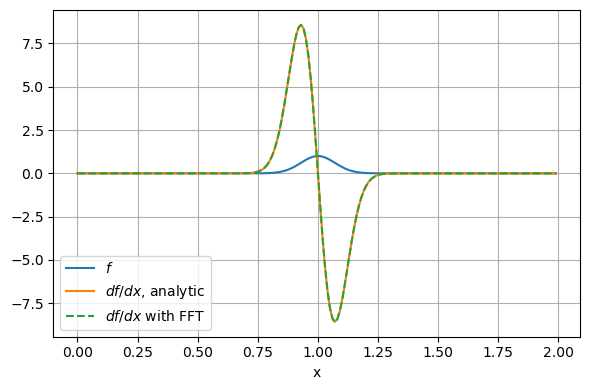

In [5]:
plt.figure(dpi=100)
plt.plot(x, farr, label='$f$')
plt.plot(x, farr_derivative, label='$df/dx$, analytic')
plt.plot(x, f_derivative_fft, '--', label='$df/dx$ with FFT')
plt.legend(loc=3)
plt.xlabel('x')
plt.grid()
plt.tight_layout()
plt.show()

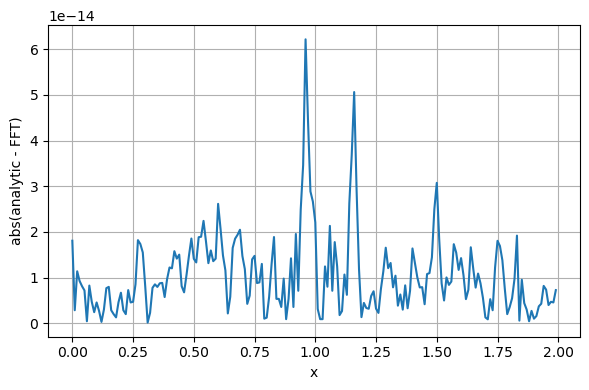

In [6]:
plt.figure(dpi=100)
plt.plot(x, abs(farr_derivative-f_derivative_fft))
plt.xlabel('x')
plt.ylabel('abs(analytic - FFT)')
plt.grid()
plt.tight_layout()
plt.show()

### Second derivative

$$ f = \sin(x) - 2\sin(4x) + 3\sin(5x) - 4\sin(6x)$$

In [7]:
from dcst import dst, idst, dct, idct  # From Newman's dcst.py

N = 256
x = np.arange(N)*np.pi/N  # x = pi*n/N
farr = np.sin(x) - 2*np.sin(4*x) + 3*np.sin(5*x) - 4*np.sin(6*x)  # function is a sine series
fCoeffs = dst(farr)  # do fourier sine series
print('Original series: f = sin(x) - 2sin(4x) + 3sin(5x) - 4sin(6x)')
for j in range(7):
    print('Coefficient of sin({0}x): {1:.2e}'.format(j, fCoeffs[j]/N))

Original series: f = sin(x) - 2sin(4x) + 3sin(5x) - 4sin(6x)
Coefficient of sin(0x): 0.00e+00
Coefficient of sin(1x): 1.00e+00
Coefficient of sin(2x): -4.58e-17
Coefficient of sin(3x): -5.64e-16
Coefficient of sin(4x): -2.00e+00
Coefficient of sin(5x): 3.00e+00
Coefficient of sin(6x): -4.00e+00


In [9]:
# Below: 2nd derivative also a sine series
d2f_dx2_a = -np.sin(x) + 32*np.sin(4*x) - 75*np.sin(5*x) + 144*np.sin(6*x)

# 2nd derivative using Fourier transform
DerivativeCoeffs = -np.arange(N)**2*fCoeffs  
d2f_dx2_b = idst(DerivativeCoeffs)

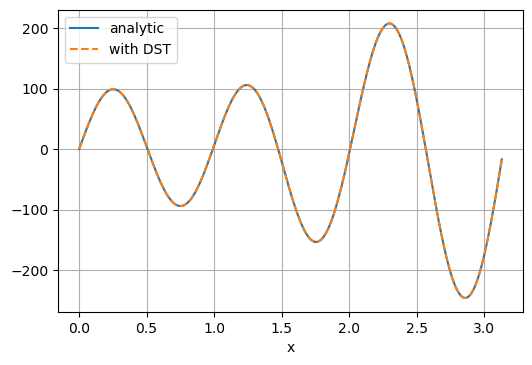

In [12]:
plt.figure(dpi=100)
plt.plot(x, d2f_dx2_a, label='analytic')
plt.plot(x, d2f_dx2_b, '--', label='with DST')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

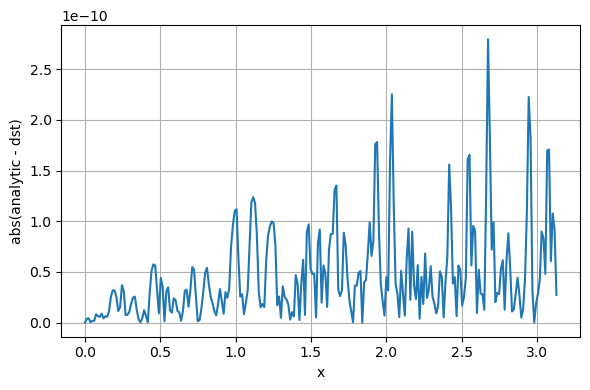

In [13]:
plt.figure(dpi=100)
plt.plot(x, abs(d2f_dx2_a - d2f_dx2_b))
plt.xlabel('x')
plt.ylabel('abs(analytic - dst)')
plt.tight_layout()
plt.grid()
plt.show()

# Summary

* Last week: FTCS was 
    * an explicit scheme,
    * unstable for hyperbolic PDEs (wave eqn.)
* This week, FTCS with implicit time stepping:
    * infers what RHS of next step is based on present step, and inverts.
    * stable for hyperbolic PDEs, but decays (bad accuracy)
    

* Crank-Nicolson:
    * average of implicit and explicit, also requires matrix inversion,
    * neither grows nor decays
* Spectral methods:
    * leverage $\partial_x f \to i k \hat f$ and powerful FFT methods,
    * can be much faster than grid-based schemes (though it depends),
    * Very accurate
    * Not too flexible when it comes to domain shape.